In [82]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PythonProject2Data/NYPD_Arrests_Data_Historic.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308871,24092381,08/31/2006,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1402502,F,Q,115,0.0,25-44,M,WHITE HISPANIC,1012648.0,214098.0,40.754289,-73.897502,POINT (-73.89750191399997 40.75428869800004)
5308872,24157849,09/05/2006,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,B,40,0.0,18-24,M,BLACK,1009374.0,235406.0,40.812783,-73.909239,POINT (-73.90923937299993 40.81278337600002)
5308873,24419289,09/21/2006,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,17,4.0,25-44,F,WHITE,992411.0,215025.0,40.756875,-73.970544,POINT (-73.97054405699998 40.75687491100007)
5308874,24130128,09/02/2006,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,K,79,0.0,45-64,F,BLACK,1001326.0,186947.0,40.679795,-73.938436,POINT (-73.93843631199996 40.679794835000045)


# Establishing a basis for analysis
##### For this analysis I want to find out which borough has the most dangerous vehicle traffic based on the frequency of arrests in vehicle-related violations.
##### I chose to exclude arrests that I did not deem inherently dangerous, such as parking violations and unauthorized vehicle usage.
##### I also want to see how the frequency of these arrests changed over time.

In [ ]:
# first i'll drop columns that i don't think i'll be using
df = df.drop('PD_CD', axis=1).drop('PD_DESC', axis=1).drop('KY_CD', axis=1).drop('LAW_CODE', axis=1).drop('LAW_CAT_CD', axis=1).drop('ARREST_PRECINCT', axis=1).drop('JURISDICTION_CODE', axis=1).drop('X_COORD_CD', axis=1).drop('Y_COORD_CD', axis=1).drop('Latitude', axis=1).drop('Longitude', axis=1).drop('Lon_Lat', axis=1)

In [ ]:
# looking at the general description of the arrest charge, i note the data that best matches my criteria
df['OFNS_DESC'].unique()

array([nan, 'RAPE', 'SEX CRIMES', 'DANGEROUS DRUGS', 'ARSON', 'FORGERY',
       'ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
       'CRIMINAL TRESPASS', 'ANTICIPATORY OFFENSES', 'ROBBERY',
       'PROSTITUTION & RELATED OFFENSES', 'DANGEROUS WEAPONS',
       'MISCELLANEOUS PENAL LAW', 'FRAUDS',
       'POSSESSION OF STOLEN PROPERTY 5', 'PETIT LARCENY', 'BURGLARY',
       'FORCIBLE TOUCHING', 'OFFENSES INVOLVING FRAUD', 'THEFT-FRAUD',
       'OTHER STATE LAWS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'F.C.A. P.I.N.O.S.', 'OFFENSES AGAINST THE PERSON',
       'OFFENSES AGAINST PUBLIC ADMINI',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'VEHICLE AND TRAFFIC LAWS', 'JOSTLING',
       'OTHER OFFENSES RELATED TO THEFT', 'DISORDERLY CONDUCT',
       'GRAND LARCENY', 'OTHER TRAFFIC INFRACTION',
       'POSSESSION OF STOLEN PROPERTY', 'CRIMINAL MISCHIEF & RELATED OF',
       'FOR OTHER AUTHORITIES', 'INTOXICATED & IMPAIRED DRIVING',
       'ALCOHOLIC BEVERAGE CONT

In [ ]:
# once i've selected the appropriate categories i load them into its own variable
traffic_arrests = df.loc[df['OFNS_DESC'].isin(['VEHICLE AND TRAFFIC LAWS', 'OTHER TRAFFIC INFRACTION', 'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING', 'GRAND LARCENY OF MOTOR VEHICLE', 'HOMICIDE-NEGLIGENT-VEHICLE'])]
traffic_arrests

,ARREST_KEY,ARREST_DATE,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
532,197686833,05/27/2019,VEHICLE AND TRAFFIC LAWS,K,25-44,M,BLACK
625,23920696,08/18/2006,OTHER TRAFFIC INFRACTION,K,45-64,M,BLACK
644,214196980,06/15/2020,VEHICLE AND TRAFFIC LAWS,Q,25-44,M,WHITE
647,213541886,05/26/2020,INTOXICATED & IMPAIRED DRIVING,B,45-64,M,BLACK
672,221767159,12/13/2020,INTOXICATED & IMPAIRED DRIVING,Q,25-44,M,WHITE HISPANIC
...,...,...,...,...,...,...,...
5308838,24644734,10/05/2006,GRAND LARCENY OF MOTOR VEHICLE,K,18-24,M,BLACK
5308840,24092277,08/31/2006,OTHER TRAFFIC INFRACTION,Q,18-24,M,WHITE HISPANIC
5308848,24236773,09/10/2006,OTHER TRAFFIC INFRACTION,M,18-24,M,BLACK HISPANIC
5308849,24068751,08/29/2006,OTHER TRAFFIC INFRACTION,Q,25-44,M,ASIAN / PACIFIC ISLANDER


In [ ]:
# we can already start to see that brooklyn, manhattan, and queens outnumber the other 2 boroughs
traffic_arrests.groupby(['ARREST_BORO'])['ARREST_BORO'].count()

ARREST_BORO
B     91080
K    138138
M    123504
Q    142197
S     26126
Name: ARREST_BORO, dtype: int64

In [ ]:
traffic_arrests.dtypes
# the data type of the arrest date column must be set to datetime so that i can work with it
traffic_arrests['ARREST_DATE'] = pd.to_datetime(traffic_arrests['ARREST_DATE'])

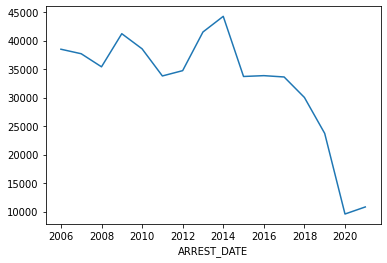

In [ ]:
# i can now plot all arrests in NYC by year
traffic_arrests.groupby(traffic_arrests.ARREST_DATE.dt.year)['ARREST_KEY'].count().plot()

Text(0.5, 0.98, 'Dangerous Traffic Arrests in NYC')

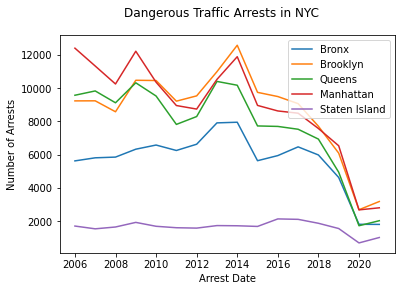

In [ ]:
# and further break this down by borough to compare them to each other
traffic_arrests.loc[traffic_arrests['ARREST_BORO'] == 'B'].groupby(traffic_arrests.ARREST_DATE.dt.year)['ARREST_KEY'].count().plot(label='Bronx')
traffic_arrests.loc[traffic_arrests['ARREST_BORO'] == 'K'].groupby(traffic_arrests.ARREST_DATE.dt.year)['ARREST_KEY'].count().plot(label='Brooklyn')
traffic_arrests.loc[traffic_arrests['ARREST_BORO'] == 'M'].groupby(traffic_arrests.ARREST_DATE.dt.year)['ARREST_KEY'].count().plot(label='Queens')
traffic_arrests.loc[traffic_arrests['ARREST_BORO'] == 'Q'].groupby(traffic_arrests.ARREST_DATE.dt.year)['ARREST_KEY'].count().plot(label='Manhattan')
traffic_arrests.loc[traffic_arrests['ARREST_BORO'] == 'S'].groupby(traffic_arrests.ARREST_DATE.dt.year)['ARREST_KEY'].count().plot(label='Staten Island')
plt.legend()
plt.xlabel('Arrest Date')
plt.ylabel('Number of Arrests')
plt.suptitle('Dangerous Traffic Arrests in NYC')

# Conclusion
##### From this data we can observe that 2009 and 2014 were record years for dangerous traffic arrests. For further clarity on why this is we could research programs or campaigns by the NYPD during this time that might have encouraged law enforcement to pursue more arrests.
##### These arrests drastically decreased in 2020, no doubt because of the COVID-19 pandemic which took everyone off the streets.
##### Manhattan and Brooklyn have the most arrests, followed by Queens. This could be due to their size, population, and/or concentration of activity.